In [79]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



In [80]:

# Load the dataset
data = pd.read_csv('data/forestfires.csv')


# EDA

In [81]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [96]:
missing_values = data.isnull().sum()
missing_values
#Data given doesn't have any missing values

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<ipython-input-105-dedf02f6fc48>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


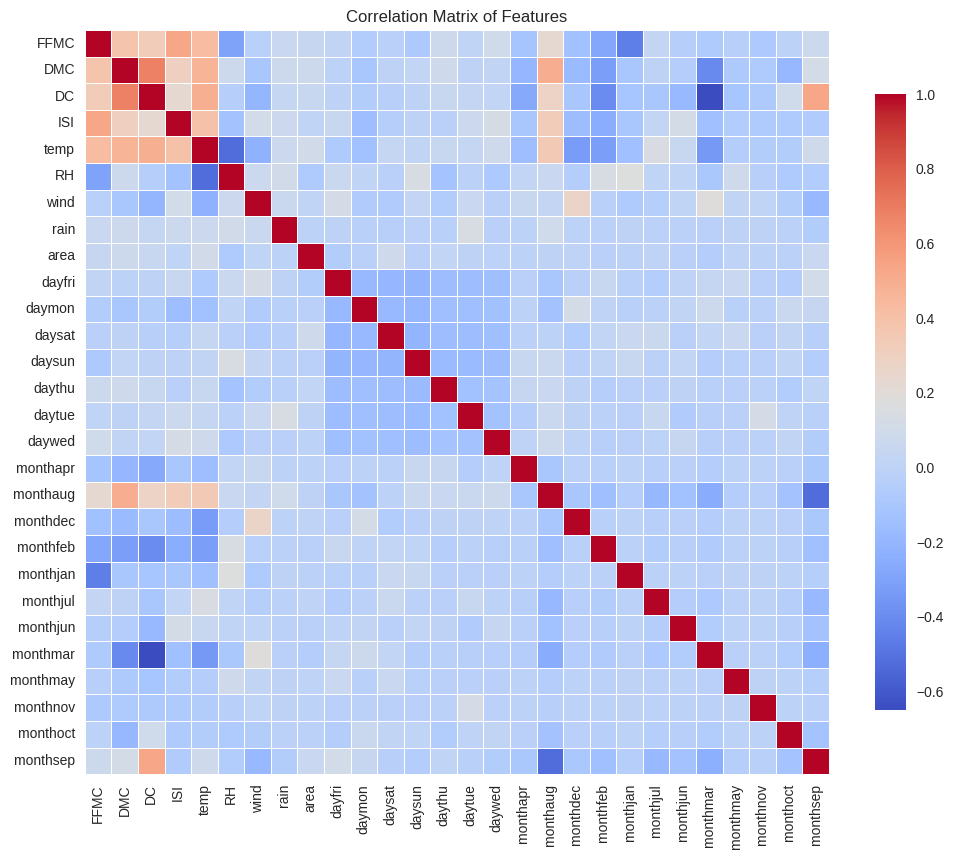

In [105]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, cbar_kws={"shrink": 0.8}, square=True)

# Rotate y-axis label
plt.yticks(rotation=0)

# Title and display the plot
plt.title('Correlation Matrix of Features')
plt.show()


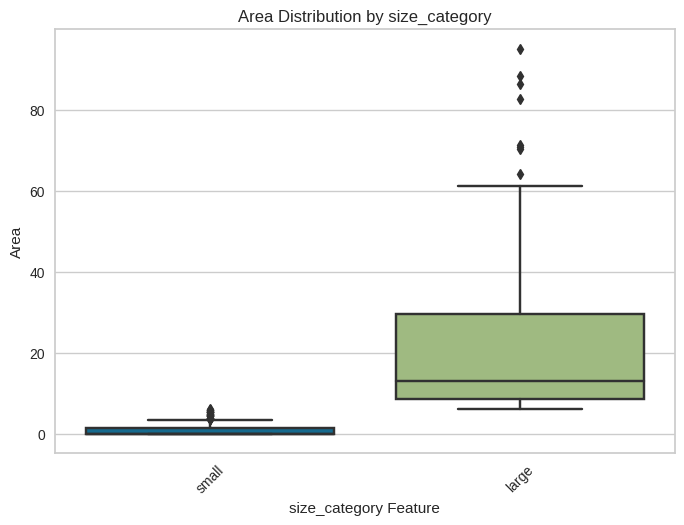

In [97]:

threshold = 100
filtered_data = data[data['area'] < threshold]

# Plot boxplot for the filtered data
sns.boxplot(x='size_category', y='area', data=filtered_data)
plt.xlabel('size_category Feature')
plt.ylabel('Area')
plt.title('Area Distribution by size_category')
plt.xticks(rotation=45)
plt.show()
#It is obvious that size category is large implies the bigger area


In [68]:

# Perform One-Hot Encoding for categorical variables (months and days)
data = pd.get_dummies(data, columns=['month', 'day', 'size_category'])

# Separate features and target variable
X = data.drop(['area'], axis=1)
y = data['area']


In [69]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category_large,size_category_small
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,1,0,0,0,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [70]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

# Outlier Removal

In [71]:
from scipy import stats

# Calculate z-scores for the target variable 'y'
z_scores = stats.zscore(y)
threshold = 3  # Define a threshold for z-score, typically 3 or -3

# Filter out data points where the absolute z-score is greater than the threshold
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

# Remove outliers from X and y
X_clean = X.drop(outlier_indices)
y_clean = y.drop(outlier_indices)

# Neural Networks modelling without hyper parameter tuning

In [33]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLP Regressor
model = MLPRegressor(hidden_layer_sizes=(40, 50), activation='relu', solver='adam', random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 9.688222423250174


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Neural Networks modelling with hyper parameter tuning and different hidden layer sizes(best fit model)

In [48]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generating sample data (Replace this with your X_clean and y_clean data)
X_clean, y_clean = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Initialize the MLP Regressor
model = MLPRegressor(random_state=42)

# hyperparameters to tune
parameters = {
    'hidden_layer_sizes': [(40,), (50,), (30, 40,), (50, 50,), (50, 30, 20,), (50, 30, 20, 40,),(50, 30, 20, 40, 50),(50, 30, 20, 40, 50,60, 70, 40, 30)  ],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
}

# Use StandardScaler within GridSearchCV
scaler = StandardScaler()
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=5)

# Scale the data within the grid search
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the grid search on scaled data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test_scaled)

# Calculate RMSE (Root Mean Squared Error) with the best model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error with best model: {rmse}")



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Root Mean Squared Error with best model: 0.8215111052648756


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


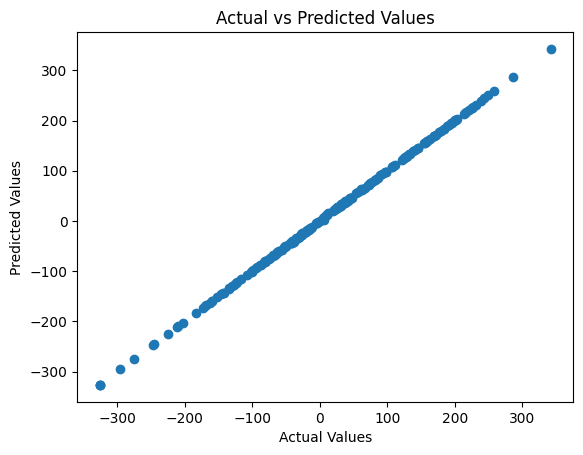

In [49]:

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

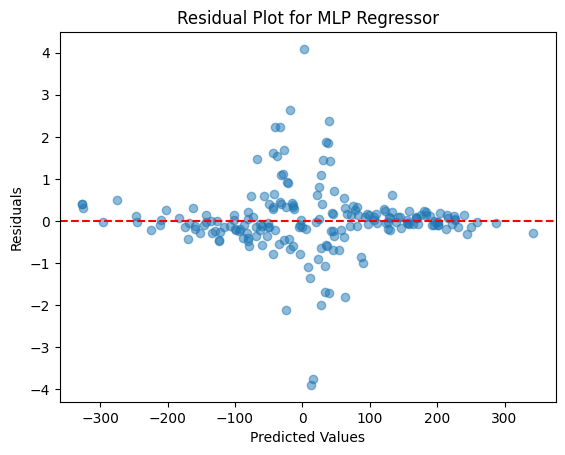

In [50]:
residuals = y_test - predictions
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for MLP Regressor')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


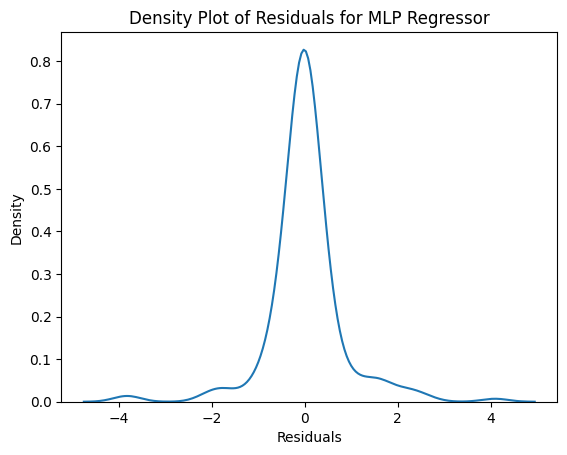

In [51]:
sns.kdeplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals for MLP Regressor')
plt.show()


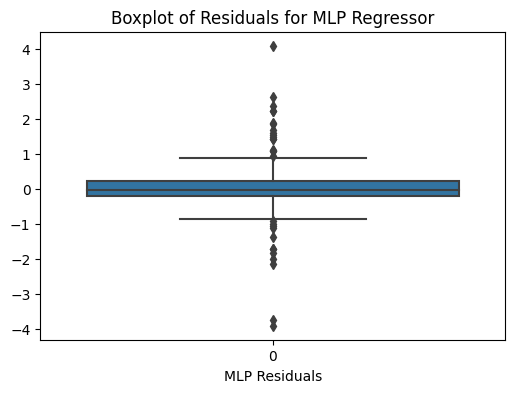

In [52]:
plt.figure(figsize=(6, 4))
sns.boxplot(residuals)
plt.xlabel('MLP Residuals')
plt.title('Boxplot of Residuals for MLP Regressor')
plt.show()


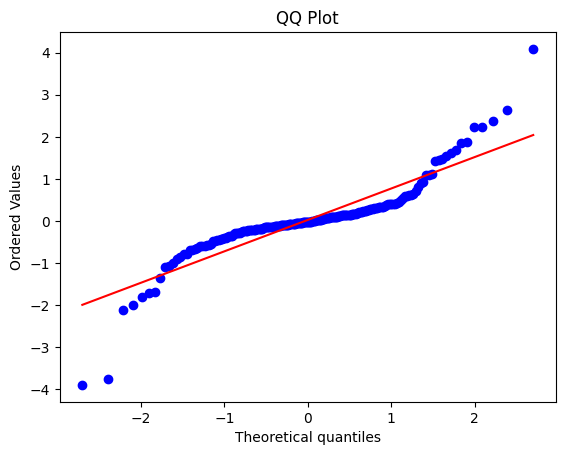

In [54]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()


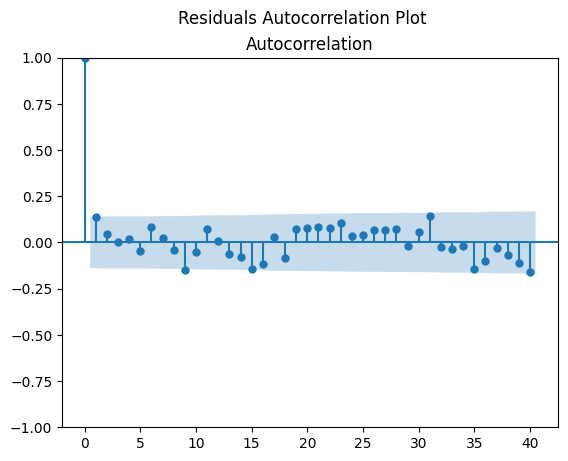

In [59]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(residuals, lags=40)
acf.suptitle('Residuals Autocorrelation Plot')
plt.show()



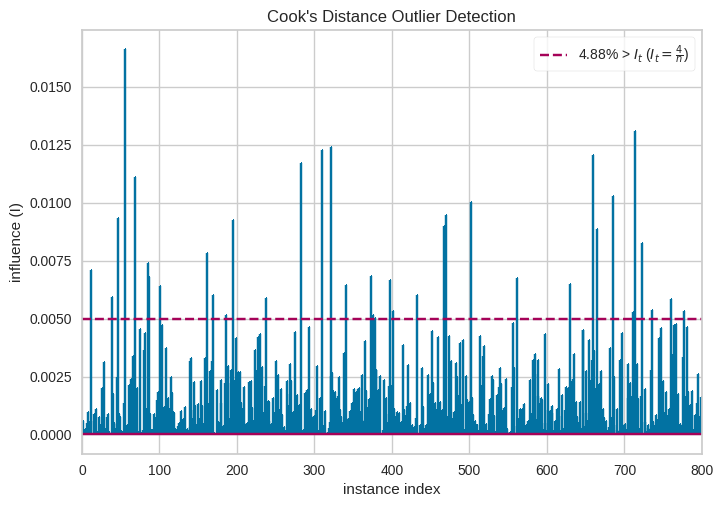

<Axes: title={'center': "Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [60]:
from yellowbrick.regressor import CooksDistance

visualizer = CooksDistance()
visualizer.fit(X_train_scaled, y_train)
visualizer.show()
# Points with higher Cook's distance have a larger influence on the model's parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

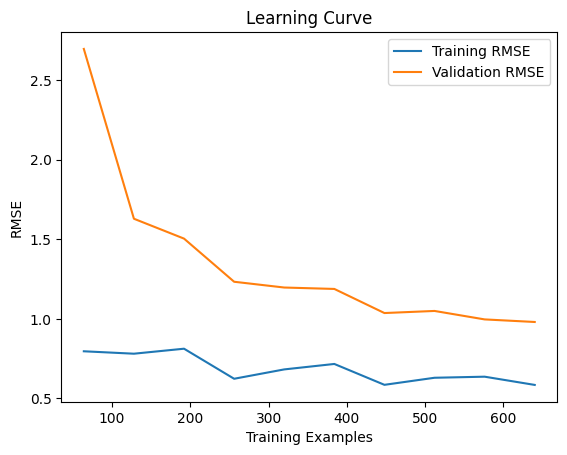

In [55]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_root_mean_squared_error', cv=5
)

train_scores_mean = np.mean(np.sqrt(-train_scores), axis=1)
val_scores_mean = np.mean(np.sqrt(-val_scores), axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training RMSE')
plt.plot(train_sizes, val_scores_mean, label='Validation RMSE')
plt.xlabel('Training Examples')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


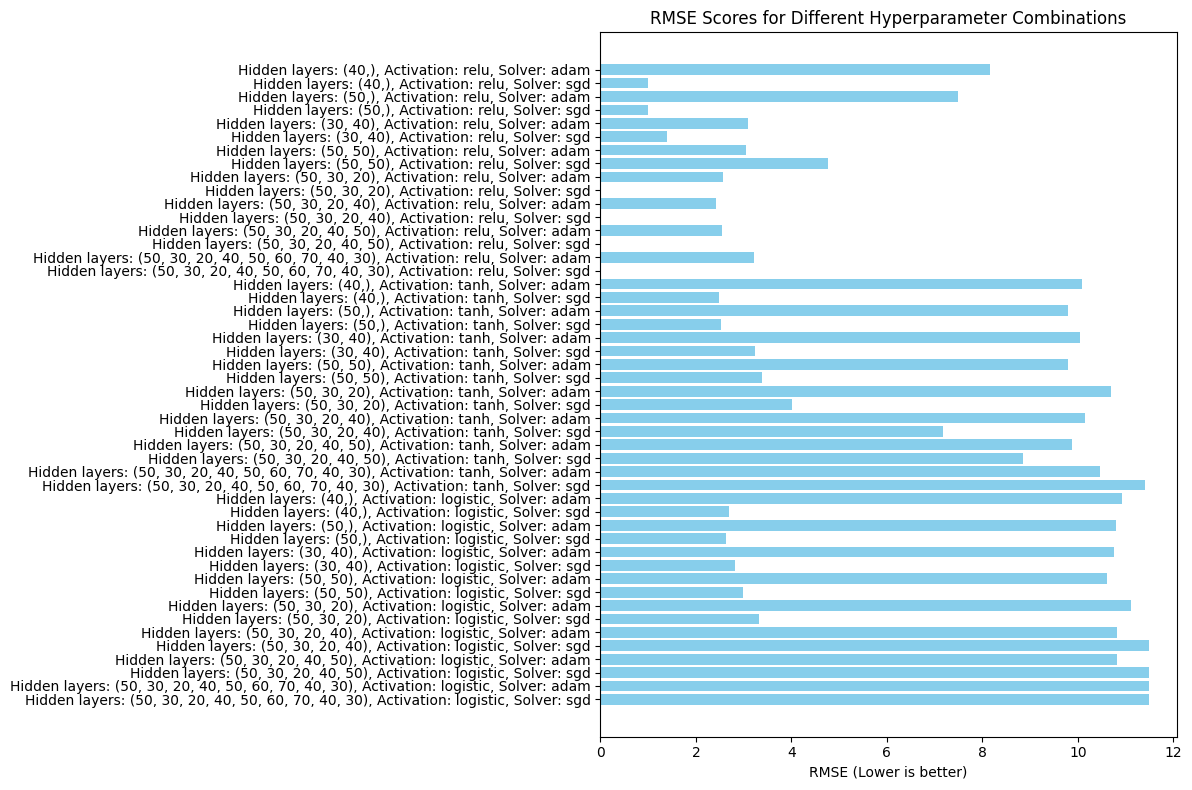

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting hyperparameters and their corresponding scores
results = grid_search.cv_results_
params = results['params']
scores = np.sqrt(-results['mean_test_score'])  # RMSE scores

# Extracting hyperparameters: hidden_layer_sizes, activation, and solver
hidden_layer_sizes = [str(param['hidden_layer_sizes']) for param in params]
activations = [param['activation'] for param in params]
solvers = [param['solver'] for param in params]

# Creating unique labels for each combination of hyperparameters
param_labels = [f"Hidden layers: {hl}, Activation: {act}, Solver: {solver}"
                for hl, act, solver in zip(hidden_layer_sizes, activations, solvers)]

# Plotting RMSE scores for different hyperparameter combinations
plt.figure(figsize=(12, 8))
plt.barh(param_labels, scores, color='skyblue')
plt.xlabel('RMSE (Lower is better)')
plt.title('RMSE Scores for Different Hyperparameter Combinations')
plt.gca().invert_yaxis()  # Invert y-axis to display the best scores on top
plt.tight_layout()
plt.show()


# Conclusion


**Relu** activation worked well as it is a simple non-linear function. It introduces non-linearity to the model, enabling it to learn complex patterns and relationships within the data.
 Compared to activation functions like tanh that can suffer from vanishing gradient problems, ReLU helps mitigate this issue to some extent.

**SGD** worked better as it updates model parameters based on the gradient computed from a single data point or a small batch of data points, which can lead to faster convergence compared to other optimization algorithms, especially in high-dimensional spaces or complex models.

Increasing hidden layers doesn't necessarily imply good performance of model as model can overfit the data. For eg: This we can clearly obtain using tanh(above graph)